# (二)使用 Linear Regression 預測在不同的時間，租借共享單車的人數預測 (count)

### 1. 讀入訓練資料 HW2_bike-sharing_train.csv。

In [1]:
import pandas as pd

df= pd.read_csv("HW2_bike-sharing_train.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-1-1 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-1-1 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-1-1 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-1-1 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-1-1 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
8381,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,562
8382,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,569
8383,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
8384,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241


### 2. 對日期欄位進行處理。

In [2]:
tmp=pd.to_datetime(df["datetime"])
#dft["year"]=tmp.dt.year
df.insert(0, "year", tmp.dt.year)
df.insert(1, "month", tmp.dt.month)
df.insert(2, "day", tmp.dt.day)
df.insert(3, "hour", tmp.dt.hour)
df.drop(columns=["datetime"], inplace=True)
df

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2012,12,19,17,4,0,1,1,16.40,20.455,50,26.0027,562
8382,2012,12,19,18,4,0,1,1,15.58,19.695,50,23.9994,569
8383,2012,12,19,19,4,0,1,1,15.58,19.695,50,26.0027,336
8384,2012,12,19,20,4,0,1,1,14.76,17.425,57,15.0013,241


### 3. 利用 regression 推測使用人數。產生準確率的指標。

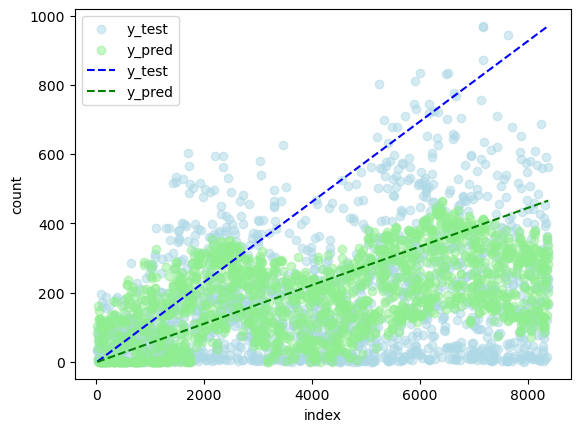

準確率的指標:
Score:  0.4042589401035013
Accuracy: 40.42589401035013%


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x=df.drop(columns=['count'])
y=df['count']


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred[y_pred < 0] = 1
plt.scatter(x_test.index, y_test, c='lightblue',alpha=0.5,label='y_test')
plt.scatter(x_test.index, y_pred, c='lightgreen',alpha=0.5,label='y_pred')

plt.plot([min(x_test.index), max(x_test.index)], [min(y_test), max(y_test)], color='blue', linestyle='--',label='y_test')
plt.plot([min(x_test.index), max(x_test.index)], [min(y_pred), max(y_pred)], color='green', linestyle='--',label='y_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('count')
plt.show()

print("準確率的指標:")
score =model.score(x_test,y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

In [4]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (判定係數):", r2)

R-squared (判定係數): 0.41171020979382733


#### 準確率的指標:
#### R-squared, R2: R平方(R squared)又稱為判定係數(coefficient of determination)，是一種衡量回歸模型表現的指標

### 4. 請利用訓練後的模型預測測試資料 HW2_ bike-sharing_test.csv 的離職情況，並將結果存成 HW2_bike-sharing _test_sol.csv，儲存格式如下範例。該結果的準確率將佔此一題分數的 35%

In [5]:
import pandas as pd

df2= pd.read_csv("HW2_bike-sharing_test.csv")
tmp2=pd.to_datetime(df2["datetime"])
#dft["year"]=tmp.dt.year
df2.insert(0, "year", tmp2.dt.year)
df2.insert(1, "month", tmp2.dt.month)
df2.insert(2, "day", tmp2.dt.day)
df2.insert(3, "hour", tmp2.dt.hour)
df2.drop(columns=["datetime"], inplace=True)
df2

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012,12,9,17,4,0,0,3,14.76,17.425,93,8.9981
1,2011,2,12,20,1,0,0,1,10.66,12.880,41,15.0013
2,2012,12,12,13,4,0,1,2,13.94,18.180,42,0.0000
3,2011,7,4,15,3,1,0,1,33.62,37.120,43,6.0032
4,2012,7,17,14,3,0,1,1,38.54,41.665,29,16.9979
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2011,4,12,18,2,0,1,3,18.04,21.970,77,15.0013
2496,2011,3,4,9,1,0,1,1,9.02,11.365,60,8.9981
2497,2011,10,1,7,4,0,0,3,17.22,21.210,67,16.9979
2498,2011,1,1,19,1,0,0,3,17.22,21.210,88,16.9979


In [6]:
new_pred=model.predict(df2)
new_pred[new_pred < 0] = 1
new_pred=new_pred.astype(int)
new_df = pd.DataFrame({'count': new_pred})
new_df.to_csv("HW2_bike-sharing_test_sol.csv", index=False)
new_df

,count
0,206
1,161
2,281
3,295
4,442
...,...
2495,135
2496,33
2497,103
2498,90


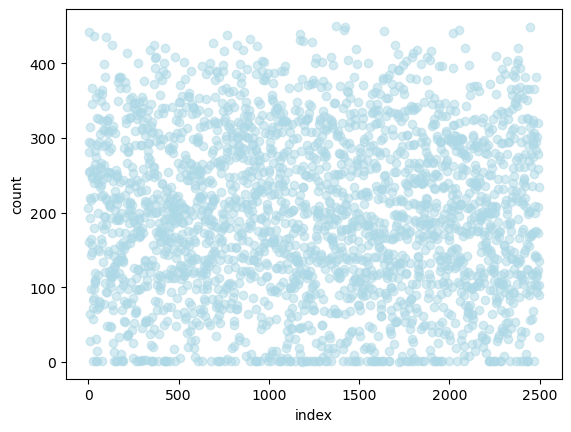

In [7]:
plt.scatter(df2.index, new_pred, c='lightblue',alpha=0.5,label='y_test')
plt.xlabel('index')
plt.ylabel('count')
plt.show()